<a href="https://colab.research.google.com/github/guilhermelaviola/InterMilan/blob/main/InterSeasons.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing all the necessary libraries:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style = 'darkgrid')
plt.style.use('seaborn-pastel')

<ipython-input-1-88ff570e2e2d>:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-pastel')


In [2]:
# Importing and displaying the last 10 goals scored:
df = pd.ExcelFile('INTER.xlsx')
players = pd.read_excel(df, 'Seasons')
players.tail(10)

,Season,Year,Serie A,Coppa Italia,Supercoppa Italiana,Champions League,Europa League,Mitropa Cup,Club World Cup / International Cup,Other Competitions,Top goalscorer(s),Goals scored
100,2014–15,2015,8,Quarter-finals,–,–,Round of 16,–,–,–,Mauro Icardi,22
101,2015–16,2016,4,Semi-finals,–,–,–,–,–,–,Mauro Icardi,16
102,2016–17,2017,7,Quarter-finals,–,–,Group stage,–,–,–,Mauro Icardi,24
103,2017–18,2018,4,Quarter-finals,–,–,–,–,–,–,Mauro Icardi,29
104,2018–19,2019,4,Quarter-finals,–,Group stage,Round of 16,–,–,–,Mauro Icardi,11
105,2019–20,2020,2,Semi-finals,–,Group stage,Runners-up,–,–,–,Romelu Lukaku,23
106,2020–21,2021,1,Semi-finals,–,Group stage,–,–,–,–,Romelu Lukaku,24
107,2021–22,2022,2,Champions,Champions,Round of 16,–,–,–,–,Lautaro Martínez,21
108,2022–23,2023,3,Champions,Champions,Runners-up,–,–,–,–,Lautaro Martínez,21
109,2023–24,2024,1,Round of 16,Champions,Round of 16,–,–,–,–,Lautaro Martínez,24


In [3]:
# Displaying the number of rows and columns in the dataset:
players.shape

(110, 12)

# **Plotting basic column data**

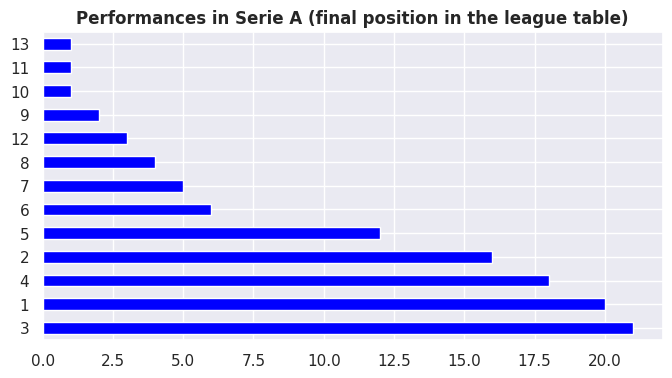

In [6]:
# Displaying performances in Serie A:
players['Serie A'].value_counts().plot(kind = 'barh', color = 'blue', figsize = (8, 4))
plt.ylabel(None)
plt.title('Performances in Serie A (final position in the league table)', fontweight = 'bold')
plt.show()

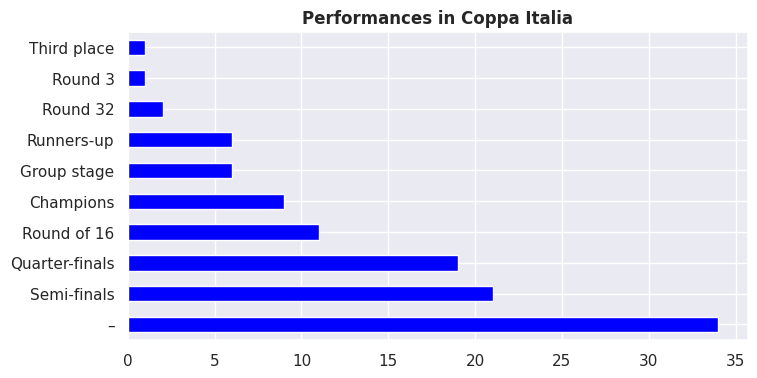

In [7]:
# Displaying performances in Coppa Italia:
players['Coppa Italia'].value_counts().plot(kind = 'barh', color = 'blue', figsize = (8, 4))
plt.ylabel(None)
plt.title('Performances in Coppa Italia', fontweight = 'bold')
plt.show()

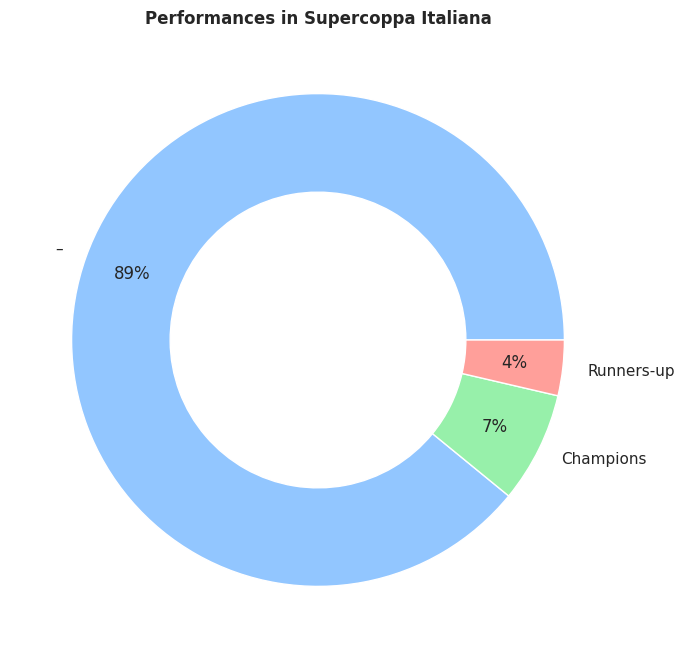

In [8]:
# Displaying performances in Supercoppa Italiana:
players['Supercoppa Italiana'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('Performances in Supercoppa Italiana', fontweight = 'bold')
plt.show()

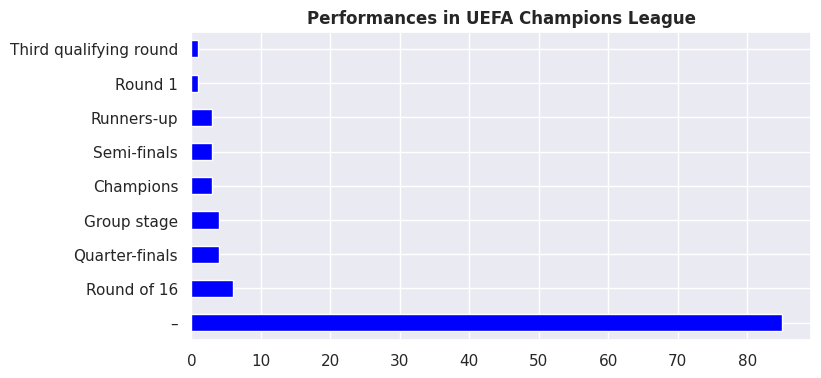

In [9]:
# Displaying performances in Champions League:
players['Champions League'].value_counts().plot(kind = 'barh', color = 'blue', figsize = (8, 4))
plt.ylabel(None)
plt.title('Performances in UEFA Champions League', fontweight = 'bold')
plt.show()

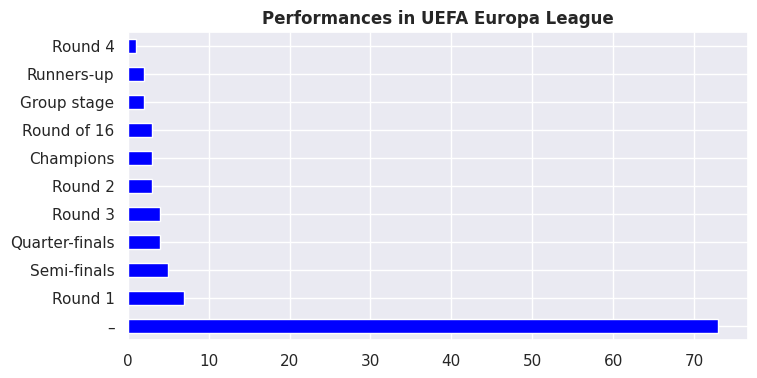

In [10]:
# Displaying performances in Europa League:
players['Europa League'].value_counts().plot(kind = 'barh', color = 'blue', figsize = (8, 4))
plt.ylabel(None)
plt.title('Performances in UEFA Europa League', fontweight = 'bold')
plt.show()

# **Plotting Inter presidents and managers who most signed players**

In [13]:
# Converting the Top goalscorer(s) column data into string:
players['Top goalscorer(s)'] = players['Top goalscorer(s)'].astype(str)

# Splitting the players names by comma and removing leading spaces:
players['Top goalscorer(s)'] = players['Top goalscorer(s)'].str.split(',').apply(lambda x : [i.strip() for i in x])

# Exploding the list into separate rows:
players = players.explode('Top goalscorer(s)')

# Counting Matrix using crosstab method:
player_counts = pd.crosstab(index = players.index, columns = players['Top goalscorer(s)'], margins = False).to_dict('index')
player_counts = pd.DataFrame(player_counts)

# Counting the number of 0s and 1s in each row:
player_counts_final = (player_counts.apply(lambda row : [sum(row == 0), sum(row == 1)], axis = 1))

In [14]:
# Defining and displaying the final count with 2 columns ('False' and 'True'):
player_counts_final = pd.DataFrame(player_counts_final.tolist(), index = player_counts_final.index, columns = ['False', 'True'])
print(player_counts_final)

                       False  True
Achille Gama             109     1
Adriano                  109     1
Aldo Serena              109     1
Alessandro Altobelli     100    10
Angelo Domenghini        109     1
Annibale Frossi          109     1
Anton Powolny            109     1
Antonio Angelillo        108     2
Beniamino Di Giacomo     109     1
Benito Lorenzi           109     1
Bernard Schuler          109     1
Bruno Quaresima          109     1
Carlo Muraro             108     2
Christian Vieri          105     5
Cosimo Muci              109     1
Diego Milito             108     2
Eddie Firmani            108     2
Emilio Agradi            109     1
Enrico Candiani          109     1
Ermanno Aebi             109     1
Ernest Peterly           109     1
Fulvio Bernardini        109     1
Gerry Hitchens           109     1
Gino Armano              108     2
Giuseppe Meazza          104     6
István Nyers             105     5
Jair da Costa            109     1
Julio Cruz          

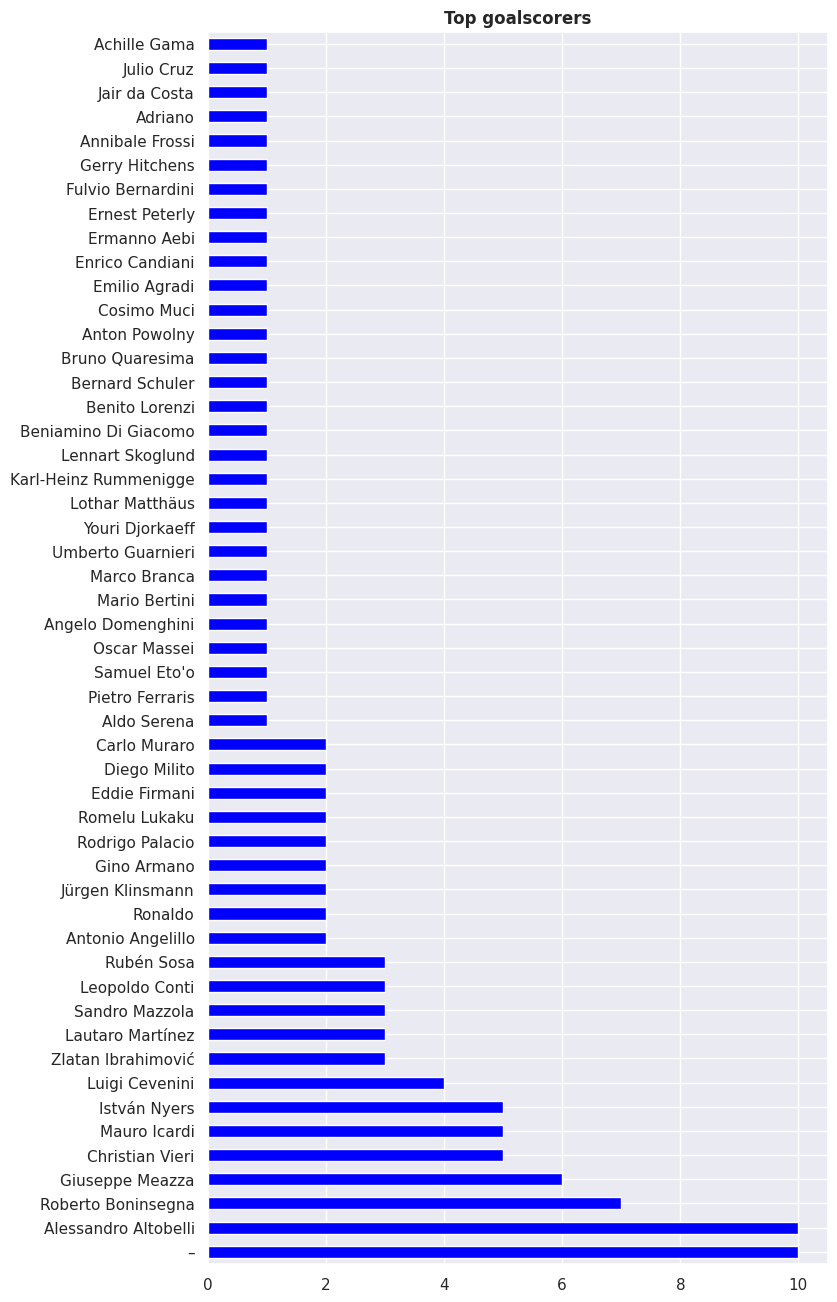

In [16]:
# Displaying top goalscorers:
player_counts_final['True'].sort_values(ascending = False).plot(kind = 'barh', color = 'blue', figsize = (8, 16))
plt.ylabel(None)
plt.title('Top goalscorers', fontweight = 'bold')
plt.show()